# Introduction

### Imports

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>Imports</a></span></li></ul></li></ul></li></ul></div>

In [81]:
import scrapy
from scrapy.crawler import CrawlerProcess
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import re
import string
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/marshallmamiya/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [1]:
class SurflineSpider(scrapy.Spider):
    name = "CN"
    
    # Here is where we insert our API call.
    start_urls = [
        'http://www.calnewport.com/blog/'
        ]

    def parse(self, response):
        # Iterate over every <article> element on the page.
        for article in response.xpath('/html/body/div[2]/div/div[1]/article'):  
           # paragraph_list = []
            #for paragraph in article.xpath('/p'):  
                #paragraph_list.extend(paragraph.xpath('p/text()'))
            # Yield a dictionary with the values we want.
            yield {
                # This is the code to choose what we want to extract
                # You can modify this with other Xpath expressions to extract other information from the site
                'title': article.xpath('h2/a/text()').extract_first(),
                'date': article.xpath('small/text()').extract_first(),
                'text': article.xpath('p/text()').extract(),

            }
                    
        # Getting the information needed to continue to the next ten entries.
        next_page = response.xpath('continue/@lhcontinue').extract_first()
        
        # Recursively calling the spider to process the next ten entries, if they exist.
        if next_page is not None:
            next_page = '{}&lhcontinue={}'.format(self.start_urls[0],next_page)
            yield scrapy.Request(next_page, callback=self.parse)
            
    
process = CrawlerProcess({
    'FEED_FORMAT': 'json',
    'FEED_URI': 'cn.json',
    'ROBOTSTXT_OBEY': False,
    'USER_AGENT': 'ThinkfulDataScienceBootcampCrawler (thinkful.com)',
    'AUTOTHROTTLE_ENABLED': True,
    'HTTPCACHE_ENABLED': True,
    'LOG_ENABLED': False,
    'CLOSESPIDER_PAGECOUNT' : 10
})
                                         

process.crawl(SurflineSpider)
process.start()

In [3]:
df = pd.read_json('cn.json')
df['text'] = df['text'].apply(lambda x: ''.join(x))

In [4]:
df.head()

,date,text,title
0,"September 10th, 2019 ·","In computer programming, it’s common to split ...",Our Brains Are Not Multi-Threaded
1,"September 3rd, 2019 ·",A college senior I’ll call Brady recently sent...,On the Surprising Benefits of an Un-Mobile Phone
2,"August 23rd, 2019 ·","During interviews for , I’m frequently asked w...",Is Our Fear of Smartphones Overblown?
3,"August 17th, 2019 ·",Something I’ve learned reporting on is that t...,"“I Was Lacking in Enough Energy, Time and Atte..."
4,"August 8th, 2019 ·","In the first chapter of , I argue that the abi...",On the Art of Learning Things (Ultra) Quickly


In [91]:
stop_words = set(stopwords.words('english')) 

def no_stop(text):
    important_words = []
    for word in text:
        if word not in list(stop_words) and word != '':
            important_words.append(word)
    return important_words

In [92]:
pattern = '[!"#$%&\'()*+,./:;<=>?@[\\]^_`{|}~]'

df['count_text'] = df['text'].apply(lambda x: re.sub(pattern, "", x.lower()).split(' '))
df['count_text'] = df['count_text'].apply(lambda x: no_stop(x))
df['count_text'] = df['count_text'].apply(lambda x: Counter(x))
df['most_common_words'] = df['count_text'].apply(lambda x: dict(x.most_common(15)))



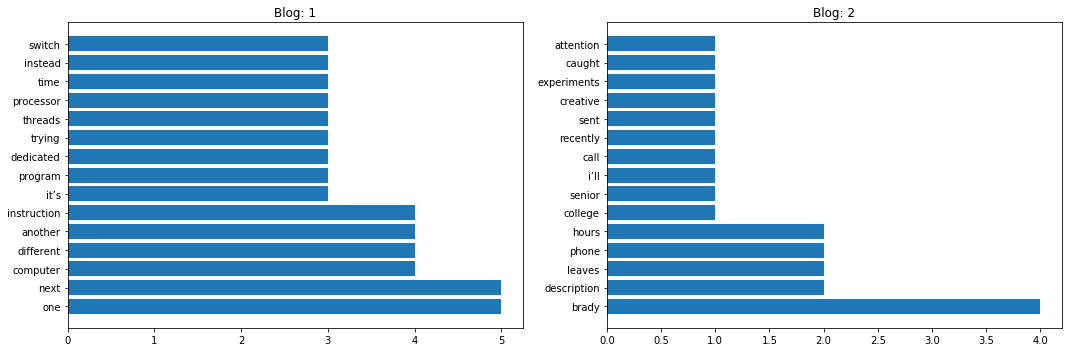

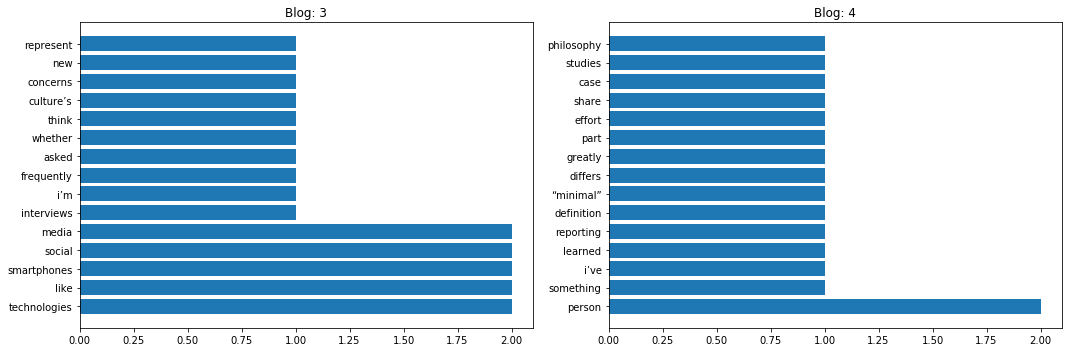

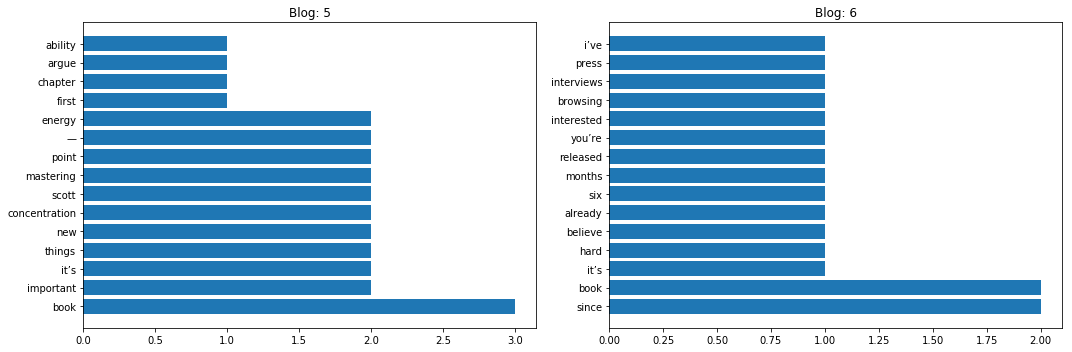

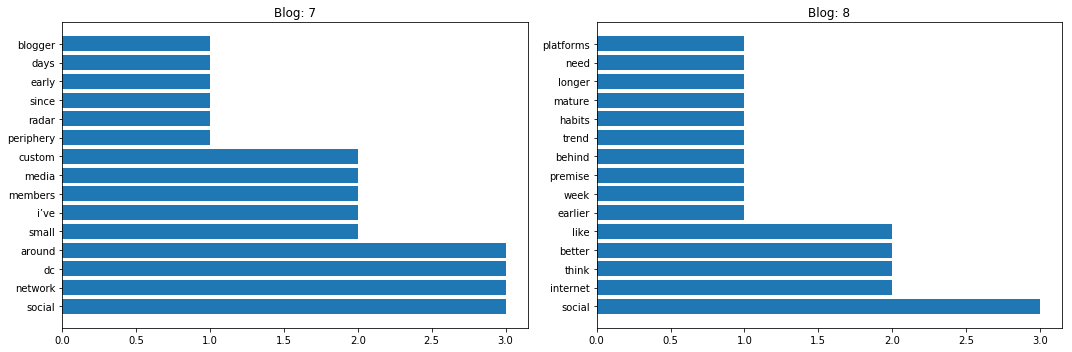

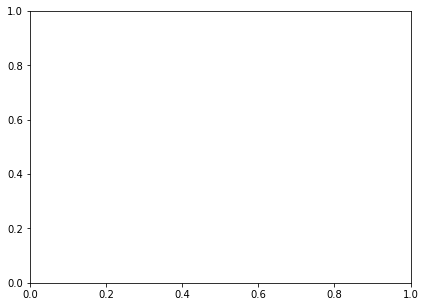

In [117]:
next_i = 0

for i in range(len(df)):
    try:
        plt.figure(figsize=(15,5))
        plt.subplot(1,2,1)
        plt.barh(list(df['most_common_words'][i+next_i].keys()), list(df['most_common_words'][i+next_i].values()))
        plt.title('Blog: ' + str(i+next_i+1))
        next_i += 1
        plt.subplot(1,2,2)
        plt.barh(list(df['most_common_words'][i+next_i].keys()), list(df['most_common_words'][i+next_i].values()))
        plt.title('Blog: ' + str(i+next_i+1))
        plt.tight_layout()
        plt.show()
    except KeyError:
        break
    
    
    
    

In [123]:
all_text = []

In [122]:
for word_list in df['count_text']:
    list(word_list.keys())

0    {'computer': 4, 'programming': 1, 'it’s': 3, '...
1    {'college': 1, 'senior': 1, 'i’ll': 1, 'call':...
2    {'interviews': 1, 'i’m': 1, 'frequently': 1, '...
3    {'something': 1, 'i’ve': 1, 'learned': 1, 'rep...
4    {'first': 1, 'chapter': 1, 'argue': 1, 'abilit...
5    {'it’s': 1, 'hard': 1, 'believe': 1, 'already'...
6    {'periphery': 1, 'radar': 1, 'since': 1, 'earl...
7    {'earlier': 1, 'week': 1, 'premise': 1, 'behin...
Name: count_text, dtype: object